In [ ]:
!pip install tabulate


Saving hotel_bookings.csv to hotel_bookings.csv
Logistic Regression:
Accuracy: 0.9318, Precision: 0.0000, Recall: 0.0000, F1-Score: 0.0000

KNN:
Accuracy: 0.9773, Precision: 1.0000, Recall: 0.5000, F1-Score: 0.6667

Random Forest:
Accuracy: 0.9545, Precision: 0.0000, Recall: 0.0000, F1-Score: 0.0000

Logistic Regression (Tuned):
Accuracy: 0.9545, Precision: 0.0000, Recall: 0.0000, F1-Score: 0.0000

KNN (Tuned):
Accuracy: 0.9545, Precision: 0.0000, Recall: 0.0000, F1-Score: 0.0000

Random Forest (Tuned):
Accuracy: 0.9545, Precision: 0.0000, Recall: 0.0000, F1-Score: 0.0000

📊 Model Performance Comparison

+---------------------+----------------------------+---------------------------+
| Model               |   Accuracy (Before Tuning) |   Accuracy (After Tuning) |
+=====================+============================+===========================+
| Logistic Regression |                      93.18 |                     95.45 |
+---------------------+----------------------------+------------

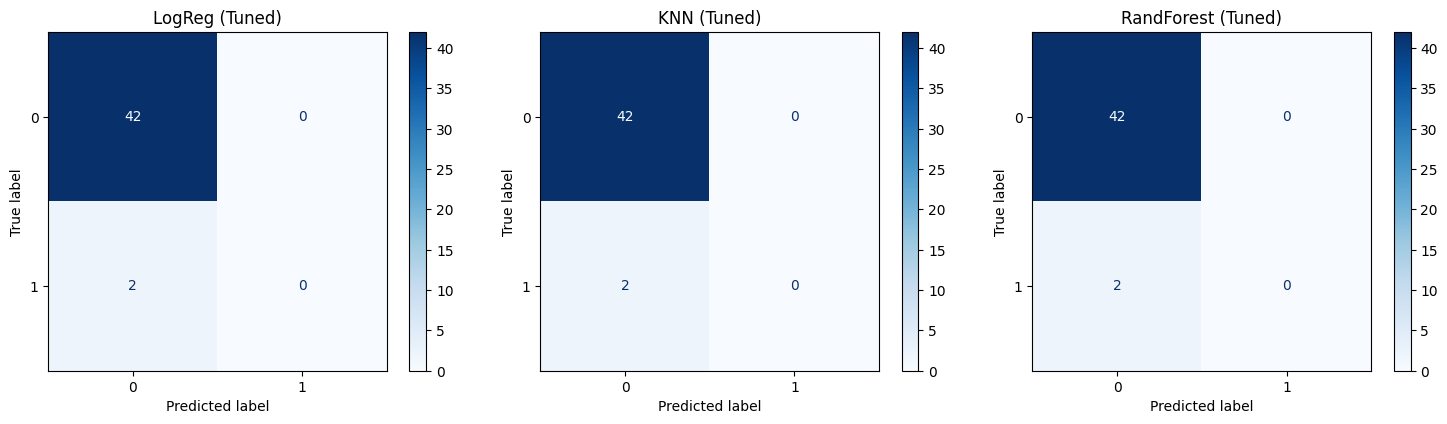


🏆 Final Recommendation:
The best performing model after tuning is **Logistic Regression (Tuned)** with accuracy of 95.45%.


In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from google.colab import files
from tabulate import tabulate

# Step 2: Load Dataset
uploaded = files.upload()
df = pd.read_csv("hotel_bookings.csv")
df.dropna(inplace=True)

# Target & Features
y = df['is_canceled']
X = df.drop(['is_canceled', 'reservation_status', 'reservation_status_date'], axis=1)

# Step 3: Preprocessing
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X.select_dtypes(include=["object"]).columns

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

# Step 4: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Evaluation Function
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    print(f"{name}:\nAccuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1-Score: {f1:.4f}\n")
    return [name, acc, prec, rec, f1], y_pred

# Step 6: Build pipelines
lr_pipeline = Pipeline([("preprocessor", preprocessor), ("classifier", LogisticRegression(max_iter=1000))])
knn_pipeline = Pipeline([("preprocessor", preprocessor), ("classifier", KNeighborsClassifier())])
rf_pipeline = Pipeline([("preprocessor", preprocessor), ("classifier", RandomForestClassifier(random_state=42))])

# Step 7: Evaluate before tuning
results = []
res, _ = evaluate_model("Logistic Regression", lr_pipeline, X_train, X_test, y_train, y_test); results.append(res)
res, _ = evaluate_model("KNN", knn_pipeline, X_train, X_test, y_train, y_test); results.append(res)
res, _ = evaluate_model("Random Forest", rf_pipeline, X_train, X_test, y_train, y_test); results.append(res)

# Step 8: Hyperparameter tuning
lr_params = {"classifier__C": [0.01, 0.1, 1, 10]}
knn_params = {"classifier__n_neighbors": [3, 5, 7, 11]}
rf_params = {"classifier__n_estimators": [50, 100], "classifier__max_depth": [10, 20, None]}

lr_grid = GridSearchCV(lr_pipeline, lr_params, cv=3, scoring="accuracy")
knn_grid = GridSearchCV(knn_pipeline, knn_params, cv=3, scoring="accuracy")
rf_grid = GridSearchCV(rf_pipeline, rf_params, cv=3, scoring="accuracy")

lr_grid.fit(X_train, y_train)
knn_grid.fit(X_train, y_train)
rf_grid.fit(X_train, y_train)

# Step 9: Evaluate after tuning
tuned_results = []
res, pred_lr = evaluate_model("Logistic Regression (Tuned)", lr_grid.best_estimator_, X_train, X_test, y_train, y_test); tuned_results.append(res)
res, pred_knn = evaluate_model("KNN (Tuned)", knn_grid.best_estimator_, X_train, X_test, y_train, y_test); tuned_results.append(res)
res, pred_rf = evaluate_model("Random Forest (Tuned)", rf_grid.best_estimator_, X_train, X_test, y_train, y_test); tuned_results.append(res)

# Step 10: Model Comparison Table
before_tune = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])
after_tune = pd.DataFrame(tuned_results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])

comparison = pd.DataFrame({
    "Model": ["Logistic Regression", "KNN", "Random Forest"],
    "Accuracy (Before Tuning)": (before_tune["Accuracy"] * 100).round(2),
    "Accuracy (After Tuning)": (after_tune["Accuracy"] * 100).round(2)
})

print("📊 Model Performance Comparison\n")
print(tabulate(comparison, headers='keys', tablefmt='grid', showindex=False))

# Step 11: Confusion Matrices
print("\n🧩 Confusion Matrices:")
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
for i, (pred, name) in enumerate(zip([pred_lr, pred_knn, pred_rf], ['LogReg', 'KNN', 'RandForest'])):
    ConfusionMatrixDisplay.from_predictions(y_test, pred, ax=axs[i], cmap='Blues')
    axs[i].set_title(f"{name} (Tuned)")
plt.tight_layout()
plt.show()

# Step 12: Final Recommendation
best_model_index = after_tune["Accuracy"].idxmax()
best_model = after_tune.loc[best_model_index]
print("\n🏆 Final Recommendation:")
print(f"The best performing model after tuning is **{best_model['Model']}** with accuracy of {best_model['Accuracy'] * 100:.2f}%.")


Saving hotel_bookings.csv to hotel_bookings (4).csv
Logistic Regression:
Accuracy: 0.9318, Precision: 0.0000, Recall: 0.0000, F1-Score: 0.0000

KNN:
Accuracy: 0.9773, Precision: 1.0000, Recall: 0.5000, F1-Score: 0.6667

Random Forest:
Accuracy: 0.9545, Precision: 0.0000, Recall: 0.0000, F1-Score: 0.0000

Logistic Regression (Tuned):
Accuracy: 0.9545, Precision: 0.0000, Recall: 0.0000, F1-Score: 0.0000

KNN (Tuned):
Accuracy: 0.9545, Precision: 0.0000, Recall: 0.0000, F1-Score: 0.0000

Random Forest (Tuned):
Accuracy: 0.9545, Precision: 0.0000, Recall: 0.0000, F1-Score: 0.0000

📊 Model Performance Comparison

+---------------------+----------------------------+---------------------------+
| Model               |   Accuracy (Before Tuning) |   Accuracy (After Tuning) |
+=====================+============================+===========================+
| Logistic Regression |                      93.18 |                     95.45 |
+---------------------+----------------------------+--------

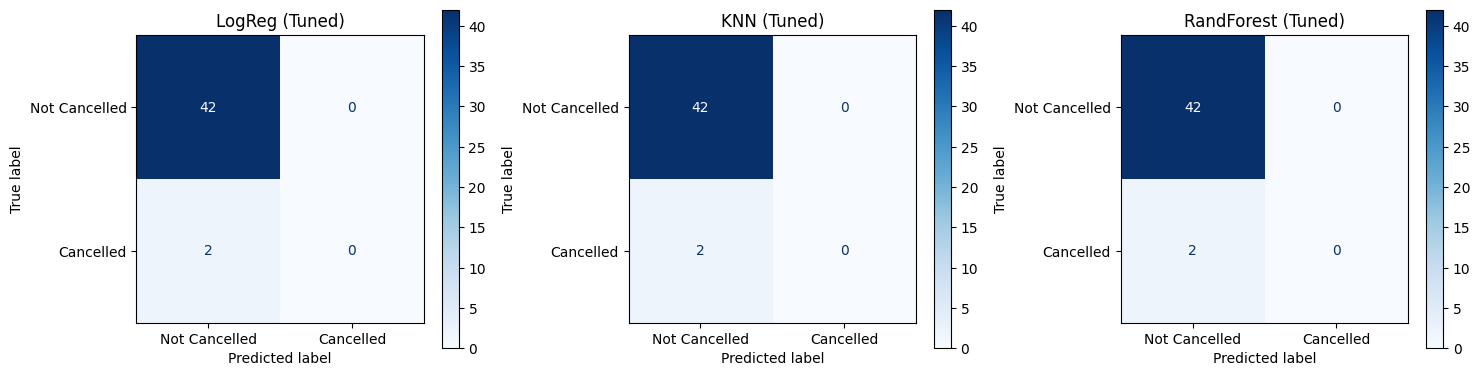

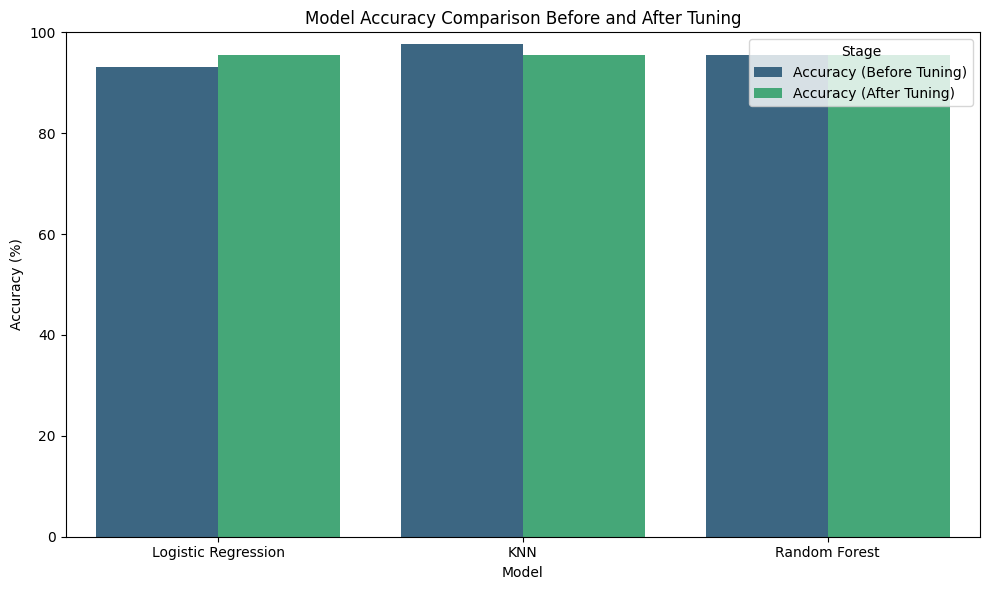

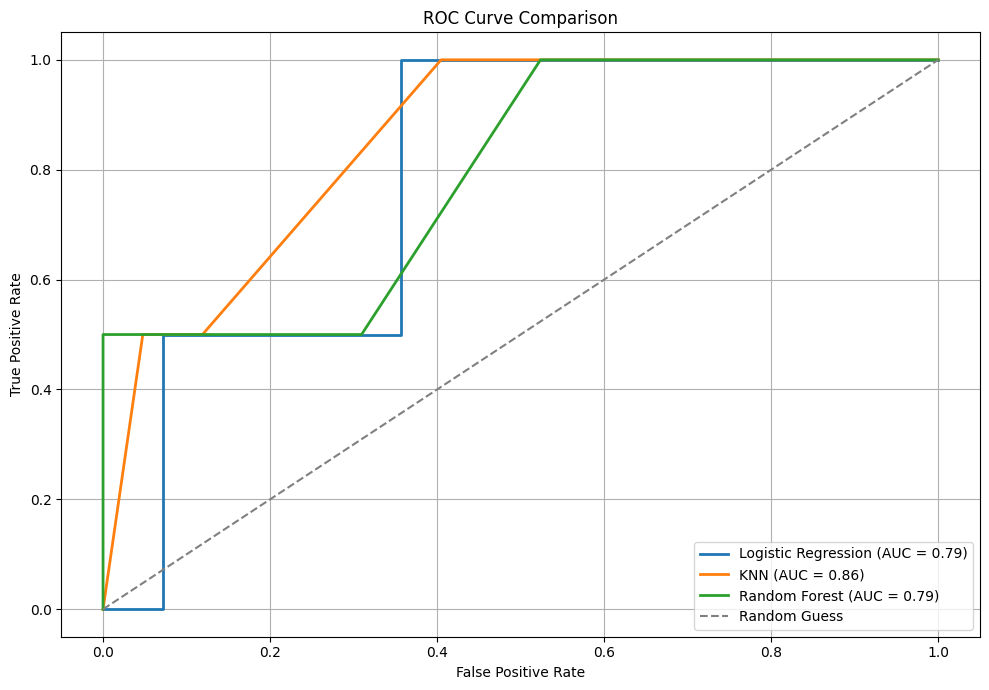


🏆 Final Recommendation:
The best performing model after tuning is **Logistic Regression (Tuned)** with accuracy of 95.45%.


In [ ]:
# Step 1: Import Libraries
import seaborn as sns
from sklearn.metrics import roc_curve, auc

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from google.colab import files
from tabulate import tabulate

# Step 2: Load Dataset
uploaded = files.upload()
df = pd.read_csv("hotel_bookings.csv")
df.dropna(inplace=True)

# Target & Features
y = df['is_canceled']
X = df.drop(['is_canceled', 'reservation_status', 'reservation_status_date'], axis=1)

# Step 3: Preprocessing
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X.select_dtypes(include=["object"]).columns

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

# Step 4: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Evaluation Function
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    print(f"{name}:\nAccuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1-Score: {f1:.4f}\n")
    return [name, acc, prec, rec, f1], y_pred

# Step 6: Build pipelines
lr_pipeline = Pipeline([("preprocessor", preprocessor), ("classifier", LogisticRegression(max_iter=1000))])
knn_pipeline = Pipeline([("preprocessor", preprocessor), ("classifier", KNeighborsClassifier())])
rf_pipeline = Pipeline([("preprocessor", preprocessor), ("classifier", RandomForestClassifier(random_state=42))])

# Step 7: Evaluate before tuning
results = []
res, _ = evaluate_model("Logistic Regression", lr_pipeline, X_train, X_test, y_train, y_test); results.append(res)
res, _ = evaluate_model("KNN", knn_pipeline, X_train, X_test, y_train, y_test); results.append(res)
res, _ = evaluate_model("Random Forest", rf_pipeline, X_train, X_test, y_train, y_test); results.append(res)

# Step 8: Hyperparameter tuning
lr_params = {"classifier__C": [0.01, 0.1, 1, 10]}
knn_params = {"classifier__n_neighbors": [3, 5, 7, 11]}
rf_params = {"classifier__n_estimators": [50, 100], "classifier__max_depth": [10, 20, None]}

lr_grid = GridSearchCV(lr_pipeline, lr_params, cv=3, scoring="accuracy")
knn_grid = GridSearchCV(knn_pipeline, knn_params, cv=3, scoring="accuracy")
rf_grid = GridSearchCV(rf_pipeline, rf_params, cv=3, scoring="accuracy")

lr_grid.fit(X_train, y_train)
knn_grid.fit(X_train, y_train)
rf_grid.fit(X_train, y_train)

# Step 9: Evaluate after tuning
tuned_results = []
res, pred_lr = evaluate_model("Logistic Regression (Tuned)", lr_grid.best_estimator_, X_train, X_test, y_train, y_test); tuned_results.append(res)
res, pred_knn = evaluate_model("KNN (Tuned)", knn_grid.best_estimator_, X_train, X_test, y_train, y_test); tuned_results.append(res)
res, pred_rf = evaluate_model("Random Forest (Tuned)", rf_grid.best_estimator_, X_train, X_test, y_train, y_test); tuned_results.append(res)

# Step 10: Model Comparison Table
before_tune = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])
after_tune = pd.DataFrame(tuned_results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])

comparison = pd.DataFrame({
    "Model": ["Logistic Regression", "KNN", "Random Forest"],
    "Accuracy (Before Tuning)": (before_tune["Accuracy"] * 100).round(2),
    "Accuracy (After Tuning)": (after_tune["Accuracy"] * 100).round(2)
})

print("📊 Model Performance Comparison\n")
print(tabulate(comparison, headers='keys', tablefmt='grid', showindex=False))

# Step 11: Confusion Matrices
print("\n🧩 Confusion Matrices:")
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
for i, (pred, name) in enumerate(zip([pred_lr, pred_knn, pred_rf], ['LogReg', 'KNN', 'RandForest'])):
    cm = confusion_matrix(y_test, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Cancelled", "Cancelled"])
    disp.plot(ax=axs[i], cmap='Blues')
    axs[i].set_title(f"{name} (Tuned)")
plt.tight_layout()
plt.show()

comparison_melted = pd.melt(
    comparison,
    id_vars="Model",
    value_vars=["Accuracy (Before Tuning)", "Accuracy (After Tuning)"],
    var_name="Stage",
    value_name="Accuracy"
)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=comparison_melted, x="Model", y="Accuracy", hue="Stage", palette="viridis")
plt.title("Model Accuracy Comparison Before and After Tuning")
plt.ylim(0, 100)
plt.ylabel("Accuracy (%)")
plt.xlabel("Model")
plt.legend(title="Stage")
plt.tight_layout()
plt.show()

models = {
    'Logistic Regression': lr_grid.best_estimator_,
    'KNN': knn_grid.best_estimator_,
    'Random Forest': rf_grid.best_estimator_
}

plt.figure(figsize=(10, 7))

for name, model in models.items():
    # Get predicted probabilities for the positive class
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot random guess line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

# Plot formatting
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.show()

# Step 12: Final Recommendation
best_model_index = after_tune["Accuracy"].idxmax()
best_model = after_tune.loc[best_model_index]
print("\n🏆 Final Recommendation:")
print(f"The best performing model after tuning is **{best_model['Model']}** with accuracy of {best_model['Accuracy'] * 100:.2f}%.")


Saving hotel_bookings.csv to hotel_bookings (2).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                    

<ipython-input-5-1a16a595b21d>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = label_encoders[col].fit_transform(df[col])
<ipython-input-5-1a16a595b21d>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = label_encoders[col].fit_transform(df[col])
<ipython-input-5-1a16a595b21d>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        61
           1       0.50      0.40      0.44         5

    accuracy                           0.92        66
   macro avg       0.73      0.68      0.70        66
weighted avg       0.92      0.92      0.92        66



Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        61
           1       1.00      0.40      0.57         5

    accuracy                           0.95        66
   macro avg       0.98      0.70      0.77        66
weighted avg       0.96      0.95      0.95        66



Classification Report for SVM:

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        61
           1       1.00      0.40      0.57         5

    accuracy                           0.95        66
  

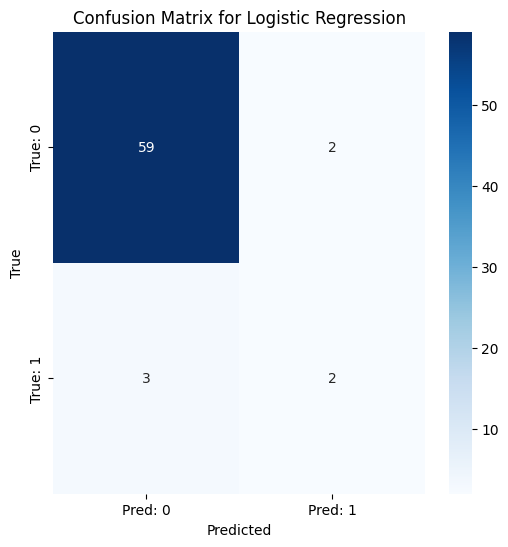

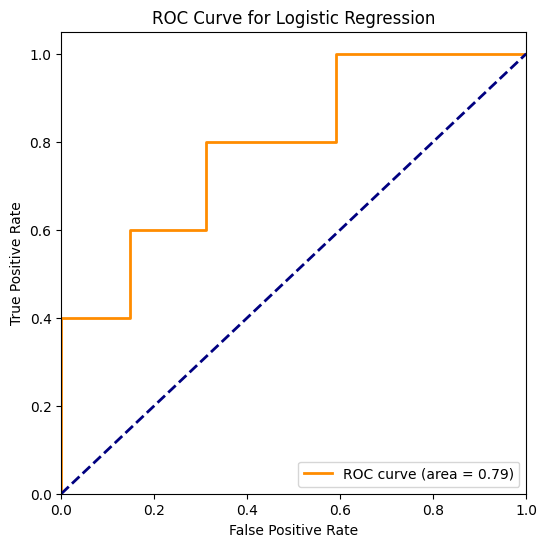

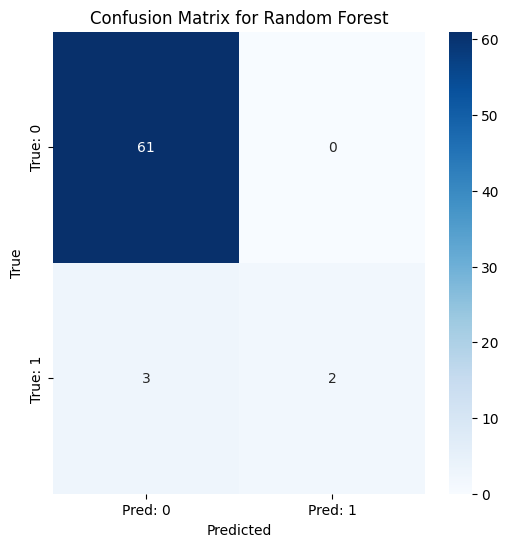

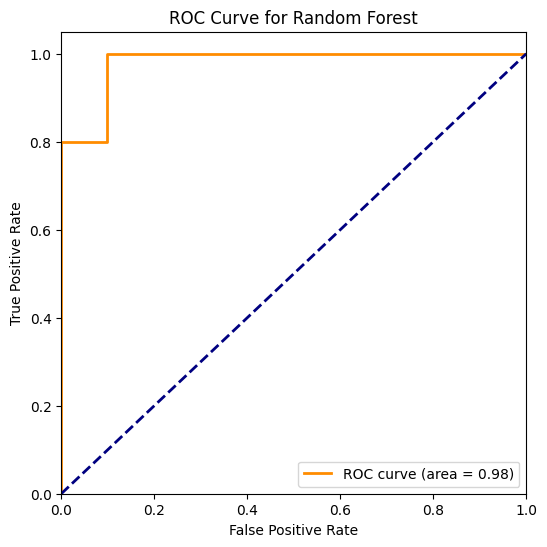

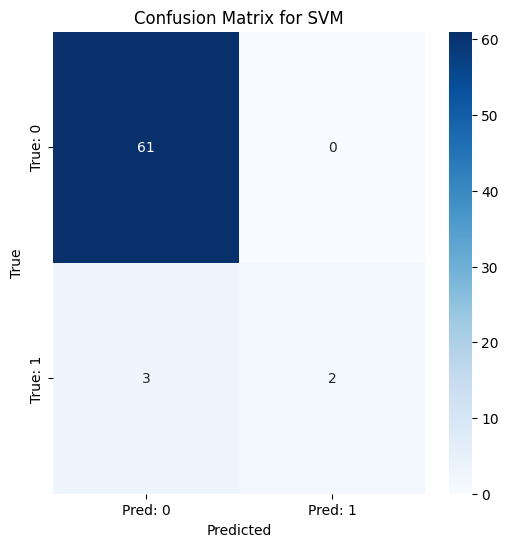

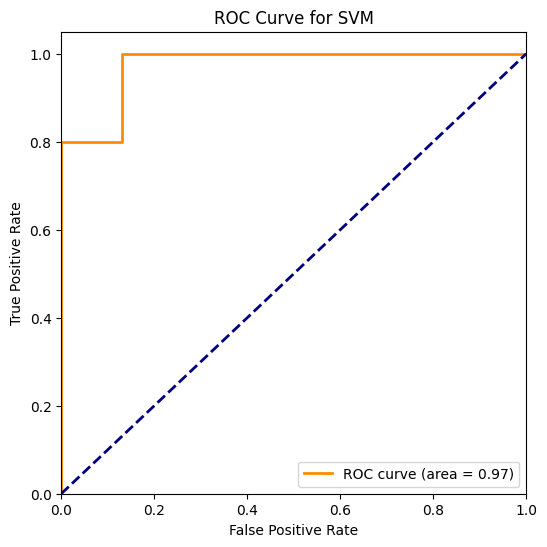

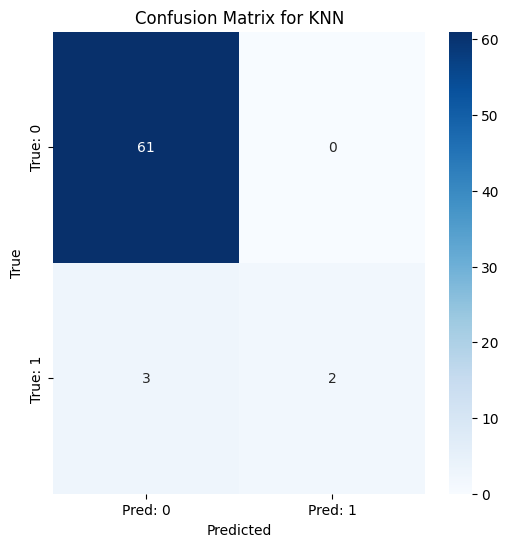

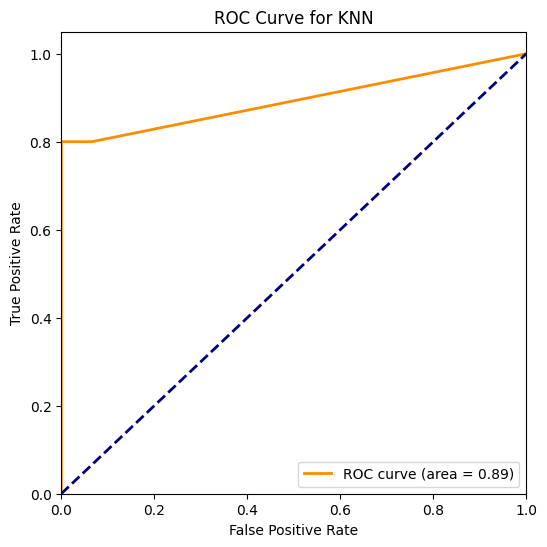

Best Model: Random Forest
ROC AUC: 0.980327868852459


In [ ]:
# Install necessary libraries
!pip install pandas numpy scikit-learn seaborn matplotlib

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.metrics import classification_report
from google.colab import files

# Step 1: Upload the dataset
uploaded = files.upload()

# Load the dataset
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# Step 2: Data Overview and Preprocessing
df.info()

# Handle missing values (drop rows with missing values or fill them with mean/median)
df = df.dropna()  # You can use df.fillna(df.mean()) instead to fill missing values

# Encode categorical columns
label_encoders = {}
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Feature selection (assuming 'is_canceled' is the target column)
X = df.drop(columns=['is_canceled'])  # Features
y = df['is_canceled']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Train and Evaluate Models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),  # probability=True to compute ROC curve
    'KNN': KNeighborsClassifier()
}

# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)

    # Return the metrics and plot confusion matrix and ROC curve
    return accuracy, precision, recall, f1, cm, fpr, tpr, roc_auc

# Store results for each model
results = {}

# Evaluate each model
for name, model in models.items():
    accuracy, precision, recall, f1, cm, fpr, tpr, roc_auc = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)

    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': cm,
        'ROC AUC': roc_auc,
        'FPR': fpr,
        'TPR': tpr
    }

    # Print classification report for each model
    print(f"Classification Report for {name}:\n")
    print(classification_report(y_test, model.predict(X_test_scaled)))
    print("\n")

# Step 4: Display Results
# Print accuracy for each model
for name, result in results.items():
    print(f"Model: {name}")
    print(f"Accuracy: {result['Accuracy']:.4f}")
    print(f"Precision: {result['Precision']:.4f}")
    print(f"Recall: {result['Recall']:.4f}")
    print(f"F1 Score: {result['F1 Score']:.4f}")
    print(f"ROC AUC: {result['ROC AUC']:.4f}")
    print("\n")

# Step 5: Plot Confusion Matrix and ROC Curves for Each Model
for name, result in results.items():
    cm = result['Confusion Matrix']
    fpr = result['FPR']
    tpr = result['TPR']
    roc_auc = result['ROC AUC']

    # Confusion Matrix Plot
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred: 0', 'Pred: 1'], yticklabels=['True: 0', 'True: 1'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

    # ROC Curve Plot
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {name}')
    plt.legend(loc='lower right')
    plt.show()

# Step 6: Select the Best Model Based on ROC AUC
best_model_name = max(results, key=lambda x: results[x]['ROC AUC'])
best_model_metrics = results[best_model_name]

print(f"Best Model: {best_model_name}")
print(f"ROC AUC: {best_model_metrics['ROC AUC']}")
